In [2]:
import os
imdb_dir=r'C:\Users\박정은\OneDrive - 고려대학교\삽질\파이썬\aclImdb\aclImdb'
train_dir=os.path.join(imdb_dir,'train')
labels=[]
texts=[]
for label_type in ['neg','pos']:
    dir_name=os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [15]:
maxlen=100
training_samples=200
validation_samples=10000
max_words=10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
data=pad_sequences(sequences,maxlen=maxlen)
labels=np.asarray(labels)
print(data.shape)
print(labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

(25000, 100)
(25000,)


In [9]:
glove_dir=r'C:\Users\박정은\OneDrive - 고려대학교\삽질\파이썬\glove.6B'
embeddings_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32')
    embeddings_index[word]=coefs
f.close()
print('%s개단어벡터 찾음'%len(embeddings_index))


400000개단어벡터 찾음


In [10]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector


In [11]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

In [12]:
model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.7353 - acc: 0.5250 - val_loss: 1.0189 - val_acc: 0.5128
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5948 - acc: 0.6550 - val_loss: 0.9127 - val_acc: 0.4972
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4644 - acc: 0.7750 - val_loss: 0.7221 - val_acc: 0.5423
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3098 - acc: 0.8750 - val_loss: 0.7150 - val_acc: 0.5428
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3001 - acc: 0.8700 - val_loss: 0.6965 - val_acc: 0.5618
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1608 - acc: 0.9800 - val_loss: 0.8659 - val_acc: 0.5381
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.0637 - acc: 1.0000 - val_loss: 0.7649 - val_acc: 0.5561
Epoch 8/10
200/200 [========

In [17]:
import matplotlib.pyplot as plt

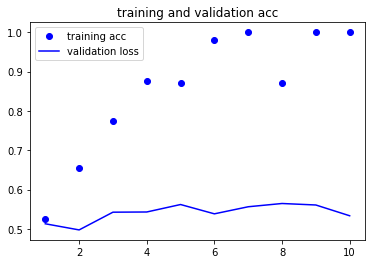

In [18]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation loss')
plt.title('training and validation acc')
plt.legend()
plt.show()

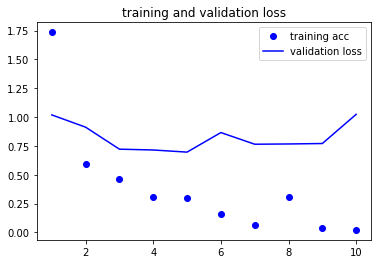

In [19]:
plt.figure()
plt.plot(epochs,loss,'bo',label='training acc')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()